In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [57]:
data = pd.read_csv(r"C:\Users\Kathleen\Downloads\prepared_df.csv")

In [58]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There were no missingness in the data

In [60]:
data['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Figure size 2000x1500 with 0 Axes>

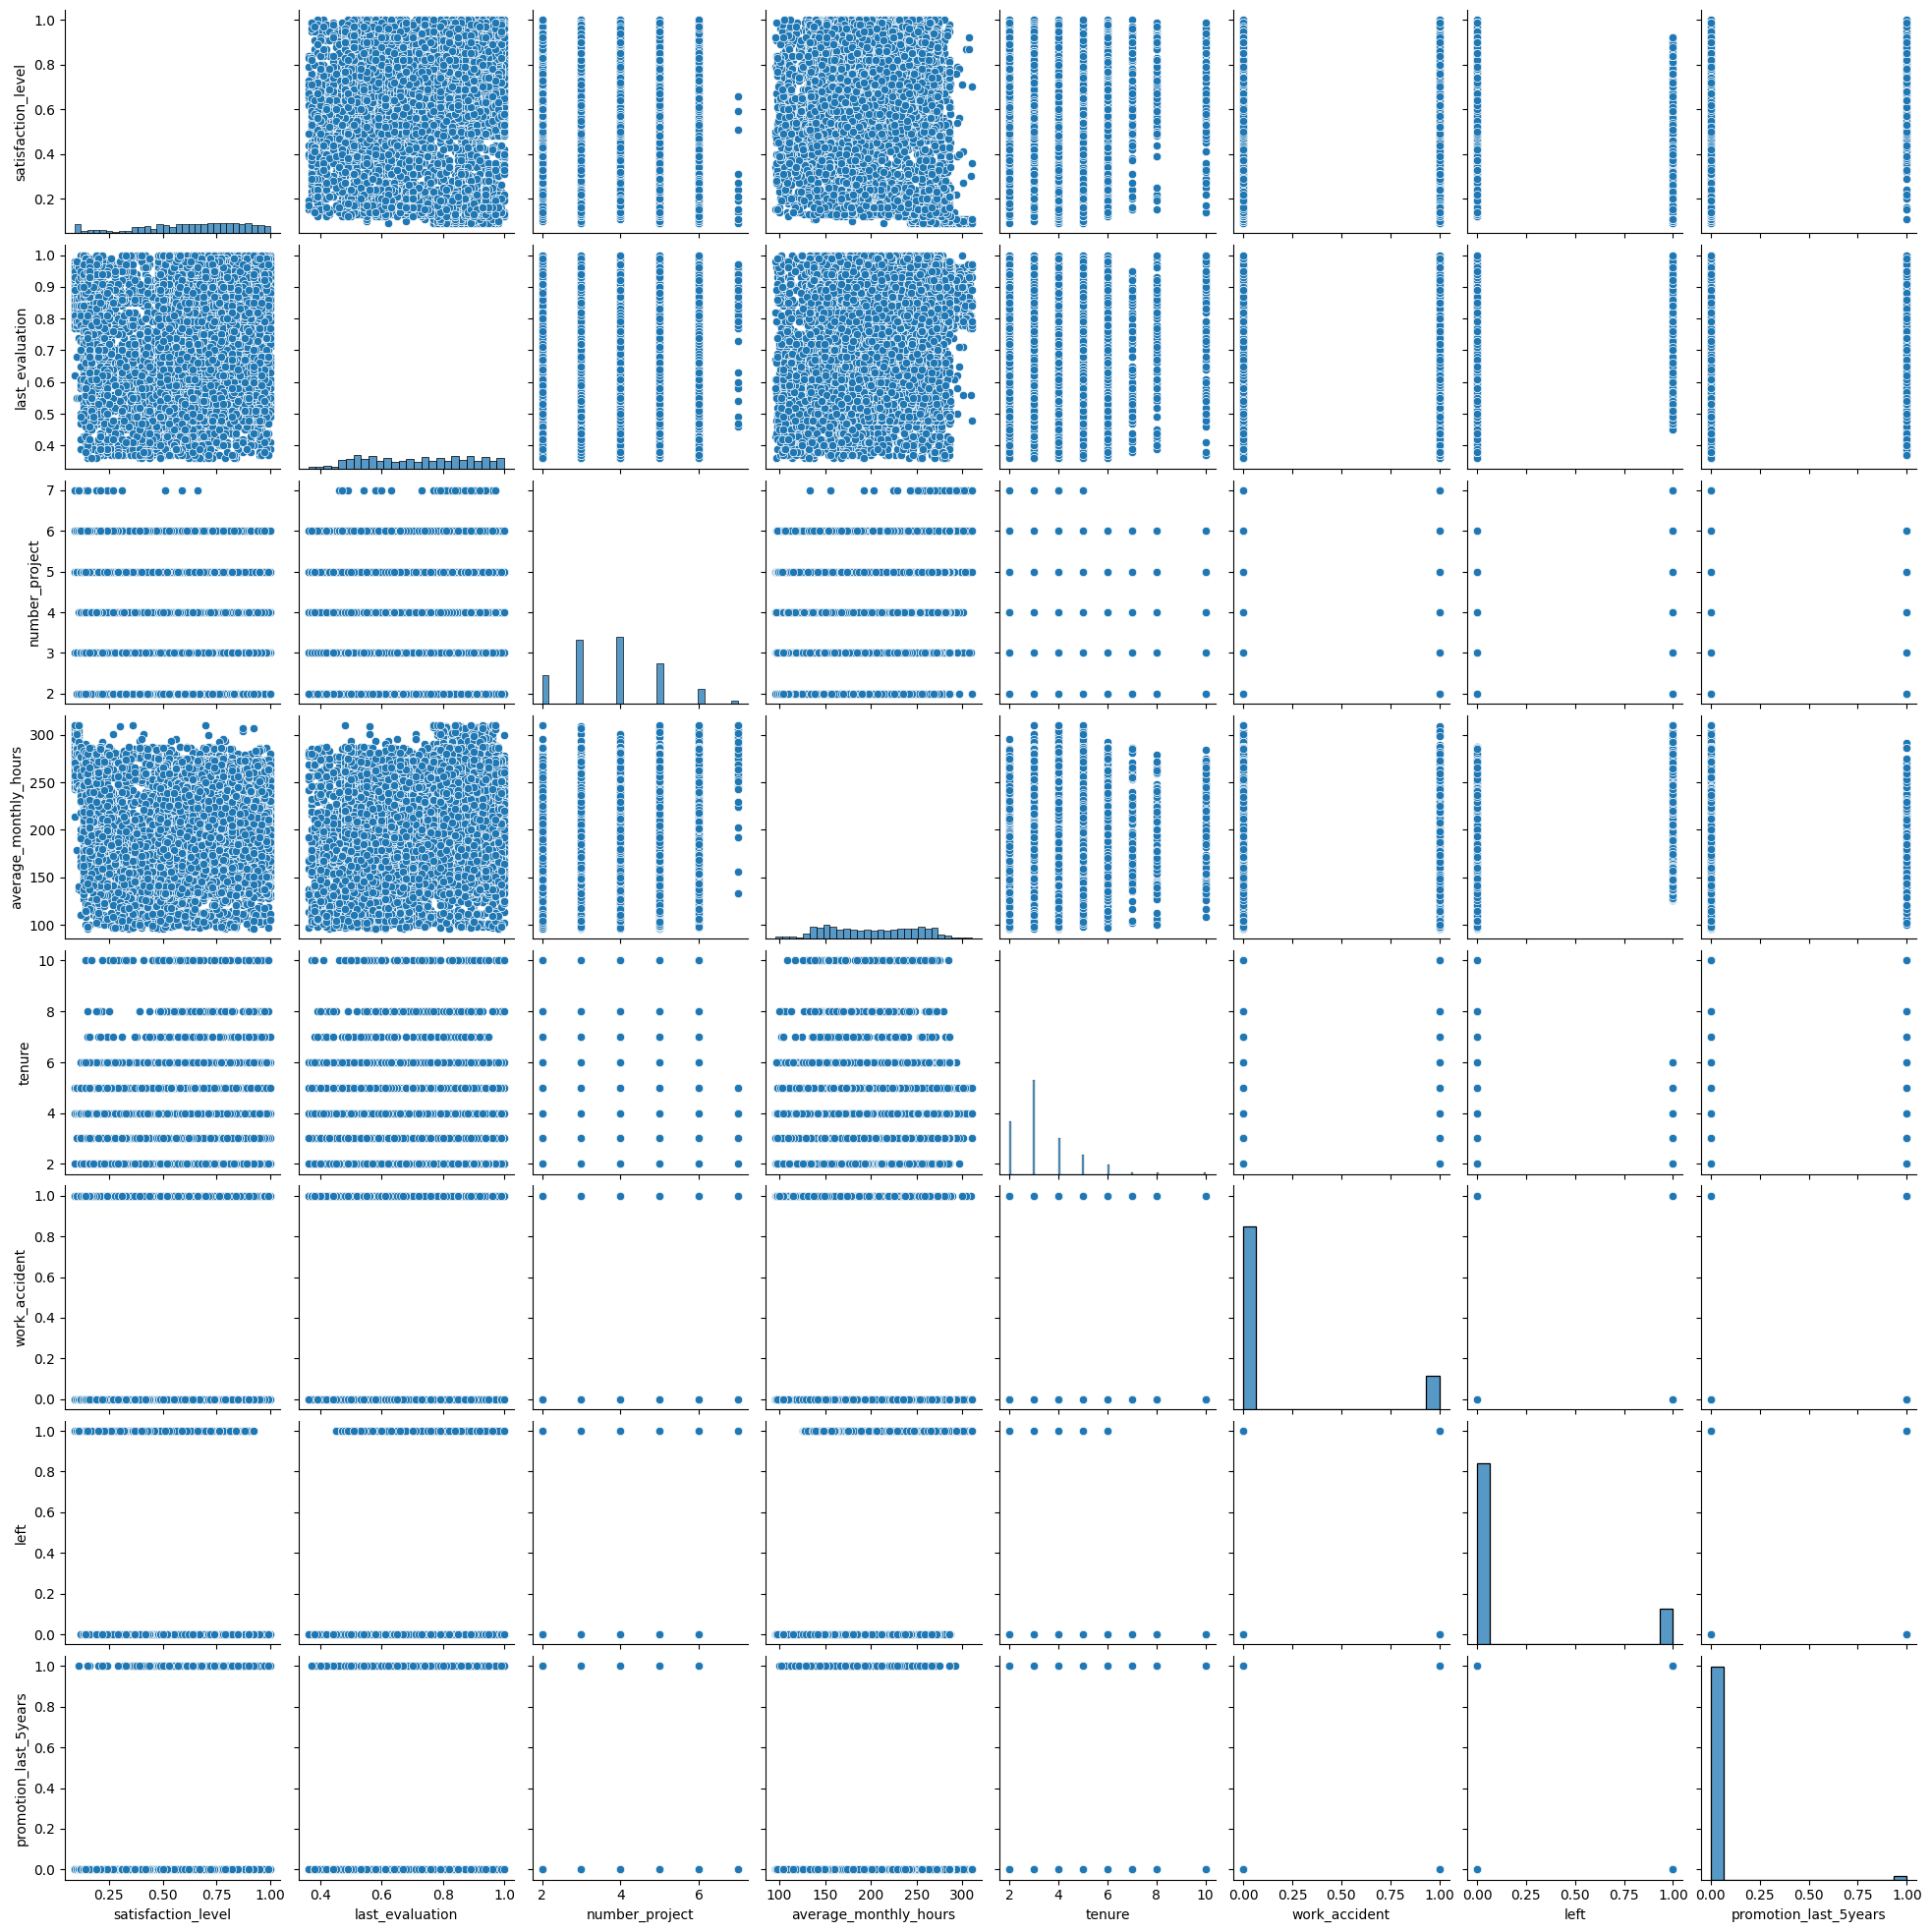

In [61]:
plt.figure(figsize=(20,15))
sns.pairplot(data=data)
plt.show()

In [62]:
df_enc = data.copy()

# Encoding the ordinal salary column

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc,drop_first=False)

percentile_25 = df_enc['tenure'].quantile(0.25)
percentile_75 = df_enc['tenure'].quantile(0.75)

iqr = percentile_75 - percentile_25

upper = (percentile_75 + 1.5) * iqr
lower = (percentile_25 - 1.5) * iqr

print(upper)
print(lower)

df_lr = df_enc[(df_enc['tenure'] >= lower) & (df_enc['tenure'] <= upper)]

X = df_lr.drop('left',axis=1)
y = df_lr['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

5.5
1.5


In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8375, 18)
(2792, 18)
(8375,)
(2792,)


#### SVC


In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train,y_train)

SVC(kernel='linear')

In [66]:
ytest_pred = svc_model.predict(X_test)
ytrain_pred = svc_model.predict(X_train)

In [67]:
# Accuracy
accuracy = accuracy_score(y_test, ytest_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification = classification_report(y_test, ytest_pred)
print(f'Classification report:\n {classification}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, ytest_pred)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.84
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2321
           1       0.58      0.26      0.36       471

    accuracy                           0.84      2792
   macro avg       0.72      0.61      0.63      2792
weighted avg       0.82      0.84      0.82      2792

Confusion Matrix:
 [[2232   89]
 [ 350  121]]


In [68]:
from sklearn.metrics import precision_score,recall_score


In [69]:
precision_score(y_test,ytest_pred)

np.float64(0.5761904761904761)

In [70]:
precision_score(y_test,ytest_pred,average='weighted')

np.float64(0.8158185046638888)

#### Naives Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

Gaussian Naive Bayes

In [72]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [73]:
y_pred = gnb.predict(X_test)

In [74]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification = classification_report(y_test, y_pred)
print(f'Classification report:\n {classification}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.86
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      2321
           1       0.56      0.77      0.65       471

    accuracy                           0.86      2792
   macro avg       0.75      0.82      0.78      2792
weighted avg       0.88      0.86      0.87      2792

Confusion Matrix:
 [[2035  286]
 [ 109  362]]


Multinomial Naive Bayes

In [75]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [76]:
y_pred = mnb.predict(X_test)

In [77]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification = classification_report(y_test, y_pred)
print(f'Classification report:\n {classification}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.83
Classification report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      2321
           1       0.00      0.00      0.00       471

    accuracy                           0.83      2792
   macro avg       0.42      0.50      0.45      2792
weighted avg       0.69      0.83      0.75      2792

Confusion Matrix:
 [[2321    0]
 [ 471    0]]


c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### KNN model

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [128]:
y_pred = knn.predict(X_test)

In [129]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification = classification_report(y_test, y_pred)
print(f'Classification report:\n {classification}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.95
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2321
           1       0.87      0.79      0.83       471

    accuracy                           0.95      2792
   macro avg       0.92      0.88      0.90      2792
weighted avg       0.94      0.95      0.94      2792

Confusion Matrix:
 [[2266   55]
 [  98  373]]


Grid search

In [101]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [122]:
#define our feature space

param_grid = {
    'n_neighbors' : [2,3],
    'p' : [1,2]   
}

In [123]:
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,scoring='precision')

In [124]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3], 'p': [1, 2]},
             scoring='precision')

In [125]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2}

In [126]:
grid_search.best_score_

np.float64(0.8704118787459546)

#### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [138]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [139]:
y_pred = dt.predict(X_test)

In [141]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification = classification_report(y_test, y_pred)
print(f'Classification report:\n {classification}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.97
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2321
           1       0.92      0.93      0.92       471

    accuracy                           0.97      2792
   macro avg       0.95      0.96      0.95      2792
weighted avg       0.97      0.97      0.97      2792

Confusion Matrix:
 [[2281   40]
 [  34  437]]


Randomized search

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
param_dist = {
    'min_samples_split': [40,50,55],
    'max_depth':[15,10,20],
    'min_samples_leaf':[15,20,25],
    'max_features':[10,8]
}

In [150]:
random_search = RandomizedSearchCV(param_distributions=param_dist,estimator=dt,cv=5,scoring='recall')

In [151]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [15, 10, 20],
                                        'max_features': [10, 8],
                                        'min_samples_leaf': [15, 20, 25],
                                        'min_samples_split': [40, 50, 55]},
                   scoring='recall')

In [152]:
random_search.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 15,
 'max_features': 10,
 'max_depth': 20}

In [153]:
random_search.best_score_

np.float64(0.902192817582638)

Grid Search

In [154]:
param_grid = {
    'min_samples_split': [45,50],
    'min_samples_leaf':[10,15,20],
    'max_features':[8,10],
    'max_depth':[18,20,22]
}

grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='recall')
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 45}
0.9085732902288047


Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [88]:
y_pred= rfc.predict(X_test)

In [89]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
classification = classification_report(y_test, y_pred)
print(f'Classification report:\n {classification}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.99
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.99      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.99      0.96      0.97      2792
weighted avg       0.99      0.99      0.99      2792

Confusion Matrix:
 [[2316    5]
 [  34  437]]


### Ensemble Methods

#### Boosting

In [90]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(f'Adaboost Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Classification report\n {classification_report(y_test,y_pred)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')

c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost Accuracy: 0.9659742120343839
Classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2321
           1       0.92      0.88      0.90       471

    accuracy                           0.97      2792
   macro avg       0.95      0.93      0.94      2792
weighted avg       0.97      0.97      0.97      2792

Confusion matrix:
 [[2284   37]
 [  58  413]]


In [91]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100,random_state=50)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(f'Gradient Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Classification report\n {classification_report(y_test,y_pred)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')

Gradient Accuracy: 0.9842406876790831
Classification report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2321
           1       0.97      0.94      0.95       471

    accuracy                           0.98      2792
   macro avg       0.98      0.97      0.97      2792
weighted avg       0.98      0.98      0.98      2792

Confusion matrix:
 [[2305   16]
 [  28  443]]


#### Stacking

In [92]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

estimators = [
    ('rfc', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(probability=True, random_state=42))
]


model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'Classification report\n {classification_report(y_test,y_pred)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')

Stacking Classifier Accuracy: 0.9853151862464183
Classification report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.98      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.98      0.96      0.97      2792
weighted avg       0.99      0.99      0.99      2792

Confusion matrix:
 [[2313    8]
 [  33  438]]


#### Voting

In [93]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = GradientBoostingClassifier(n_estimators=100, random_state=42)


model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('gb', model3)], voting='soft')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred)}")
print(f'Classification report\n {classification_report(y_test,y_pred)}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')

c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9853151862464183
Classification report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.98      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.98      0.96      0.97      2792
weighted avg       0.99      0.99      0.99      2792

Confusion matrix:
 [[2314    7]
 [  34  437]]


#### Precison Recall curve

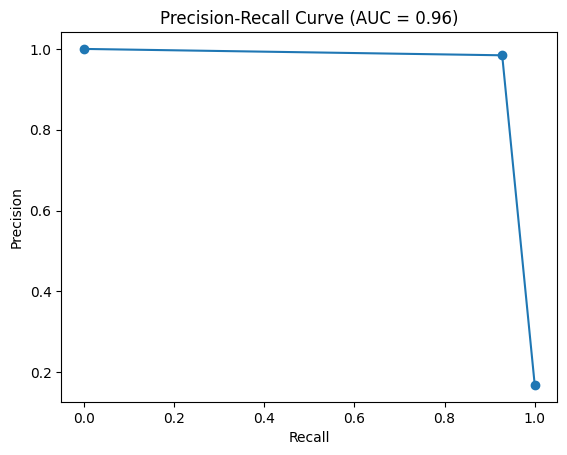

F1 Score: 0.96


In [94]:
from sklearn.metrics import precision_recall_curve,f1_score,auc,average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
f1 = f1_score(y_test,y_pred > 0.5)
auc_score = auc(recall, precision)

plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.show()

print(f'F1 Score: {f1:.2f}')

In [95]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Assuming y_true and y_scores are already defined
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Finding the index of the maximum F1 Score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold by F1 Score: {best_threshold:.2f}")
print(f"Corresponding Precision: {precision[best_threshold_index]:.2f}")
print(f"Corresponding Recall: {recall[best_threshold_index]:.2f}")

Best Threshold by F1 Score: 1.00
Corresponding Precision: 0.98
Corresponding Recall: 0.93


#### ROC CURVE

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [97]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(X_test)[:,-1]

c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

In [99]:
roc_auc = auc(fpr,tpr)
auc_score = roc_auc_score(y_test,y_pred)
print(roc_auc)
print(auc_score)

0.8927149967389048
0.8927149967389048


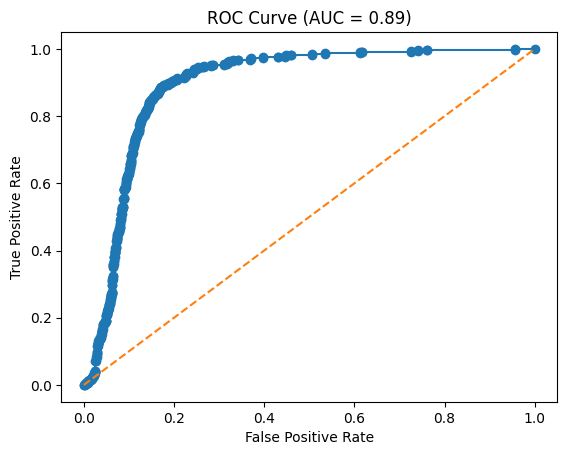

In [100]:

plt.plot(fpr, tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()